   Unnamed: 0              time   pool  max_used_capacity
0           0  2018-07-30T12:00  tln32             7307.0
1           1  2018-07-30T12:00  tam32               36.0
2           2  2018-07-30T13:00  tln32             8984.0
3           3  2018-07-30T13:00  tam32               31.0
4           4  2018-07-30T14:00  tln32             8643.0
len is 50
--- tln32 ----
    Unnamed: 0              time   pool  max_used_capacity
0            0  2018-07-30T12:00  tln32             7307.0
2            2  2018-07-30T13:00  tln32             8984.0
4            4  2018-07-30T14:00  tln32             8643.0
6            6  2018-07-30T15:00  tln32             6750.0
8            8  2018-07-30T16:00  tln32             3280.0
10          10  2018-07-30T17:00  tln32             1584.0
12          12  2018-07-30T18:00  tln32             1471.0
14          14  2018-07-30T19:00  tln32             1421.0
16          16  2018-07-30T20:00  tln32             1130.0
18          18  2018-07-30T21:00  tln

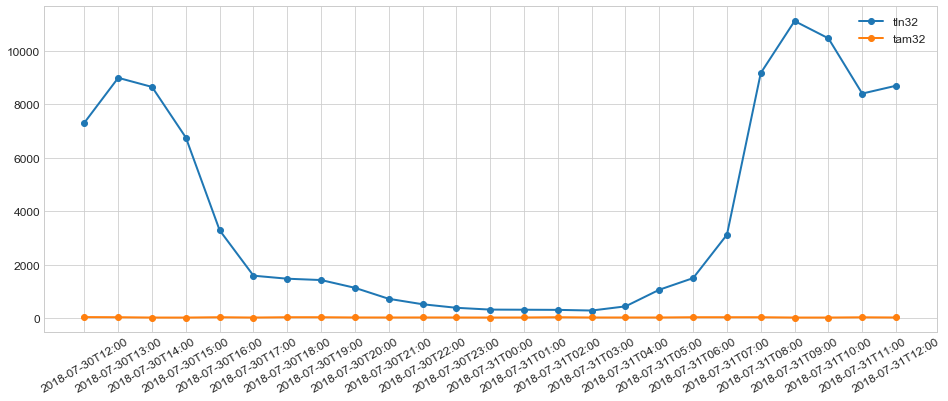

--- dfOfPool <class 'pandas.core.series.Series'> ----
pool
tam32       36.0
tln32    11107.0
Name: max_used_capacity, dtype: float64


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/workspace/logs/max_userd_capacity_AMS_ELS_20180731.csv')
print(df.head())
print("len is %d" % len(df.index))

dc = 'AMS'

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.size"] =12
fig = plt.figure(figsize=(16, 6))

poolsDf = df['pool'].unique()


i = 0
for pool in poolsDf:
    i = i + 1

    poolDf = df.loc[df['pool'] == pool]

    x = poolDf['time']
    y = poolDf['max_used_capacity']
    print("--- %s ----" % pool)
    print(poolDf)
    
    plt.xticks(rotation=30)
    plt.plot(x, y, label=pool, marker='o', linestyle='solid', linewidth=2, markersize=6)

plt.legend()
plt.show()

grouped = df['max_used_capacity'].groupby(df['pool'])
dfOfPool = grouped.max()
print("--- dfOfPool {} ----".format(type(dfOfPool)))
print(dfOfPool)
df = dfOfPool.to_csv('/workspace/logs/max_userd_capacity_all_20180731.csv')